In [83]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
import numpy as np

In [84]:
data = pd.read_csv('house-demo.csv')

In [85]:
data.head()

,Year,Housing Units,People Left Homeless,Minors Left Homeless,Area,Type of Structure,Demolish Scope,District,Demolition Reason,Demolition carried out by
0,2021.0,8,31,14,The West Bank (Excluding East Jerusalem),Residential Structure,NaN,Al-Quds,Demolition on the pretext of unlawful construc...,NaN
1,2021.0,3,5,1,The West Bank (Excluding East Jerusalem),Residential Structure,NaN,Bethlehem,Demolition on the pretext of unlawful construc...,NaN
2,2021.0,7,18,12,The West Bank (Excluding East Jerusalem),Residential Structure,NaN,Hebron,Demolition on the pretext of unlawful construc...,NaN
3,2021.0,1,0,0,The West Bank (Excluding East Jerusalem),Residential Structure,NaN,Jenin,Demolition on the pretext of unlawful construc...,NaN
4,2021.0,16,78,33,The West Bank (Excluding East Jerusalem),Residential Structure,NaN,Jericho,Demolition on the pretext of unlawful construc...,NaN


In [86]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 272 entries, 0 to 271
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Year                       269 non-null    float64
 1   Housing Units              270 non-null    object 
 2   People Left Homeless       270 non-null    object 
 3   Minors Left Homeless       269 non-null    object 
 4   Area                       269 non-null    object 
 5   Type of Structure          269 non-null    object 
 6   Demolish Scope             97 non-null     object 
 7   District                   269 non-null    object 
 8   Demolition Reason          269 non-null    object 
 9   Demolition carried out by  52 non-null     object 
dtypes: float64(1), object(9)
memory usage: 21.4+ KB


In [87]:
data.nunique()

Year                          18
Housing Units                 62
People Left Homeless         117
Minors Left Homeless          78
Area                           3
Type of Structure              2
Demolish Scope                 2
District                      21
Demolition Reason              3
Demolition carried out by      2
dtype: int64

In [88]:
data.isna().sum()

Year                           3
Housing Units                  2
People Left Homeless           2
Minors Left Homeless           3
Area                           3
Type of Structure              3
Demolish Scope               175
District                       3
Demolition Reason              3
Demolition carried out by    220
dtype: int64

In [89]:
data = data.drop(['Demolish Scope', 'Demolition carried out by'],  axis=1)
data = data.dropna()

In [90]:
data['Year'] = pd.to_datetime(data['Year'], format='%Y')
data['Year'] = data['Year'].dt.year

In [91]:
data["People Left Homeless"] = data["People Left Homeless"].str.replace(",","")
data["Minors Left Homeless"] = data["Minors Left Homeless"].str.replace(",","")
data["Housing Units"] = data["Housing Units"].str.replace(",","")
data['People Left Homeless'] = data['People Left Homeless'].astype(int)
data['Minors Left Homeless'] = data['Minors Left Homeless'].astype(int)
data['Housing Units'] = data['Housing Units'].astype(int)

In [92]:
data_years =data.groupby('Year',as_index=False).sum()
data_years = data_years[['Year','People Left Homeless','Minors Left Homeless']]
data_years

,Year,People Left Homeless,Minors Left Homeless
0,2004,11805,110
1,2005,214,78
2,2006,2473,96
3,2007,668,340
4,2008,772,422
5,2009,502,207
6,2010,612,302
7,2011,979,463
8,2012,633,326
9,2013,838,451


In [93]:
x = np.array(data_years['Year'])
y = np.array(data_years['People Left Homeless']).astype(int)
y2 = np.array(data_years['Minors Left Homeless']).astype(int)

In [94]:
x

array([2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014,
       2015, 2016, 2017, 2018, 2019, 2020, 2021], dtype=int64)

In [95]:

y

array([11805,   214,  2473,   668,   772,   502,   612,   979,   633,
         838,   925,   664,  1620,   564,   443,   713,  1011,   294])

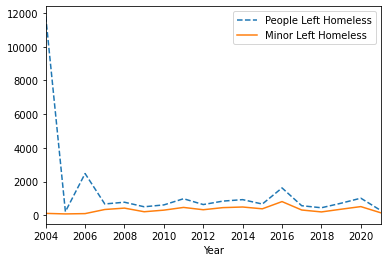

In [96]:
plt.plot(x, y, label = 'People Left Homeless', linestyle="--")
plt.plot(x, y2, label = 'Minor Left Homeless', linestyle="-")
plt.xlim(min(x) , max(x))
# plt.ylim(min(y) , max(y))
plt.xlabel('Year')
plt.legend()
plt.show()

<Figure size 64800x72000 with 0 Axes>

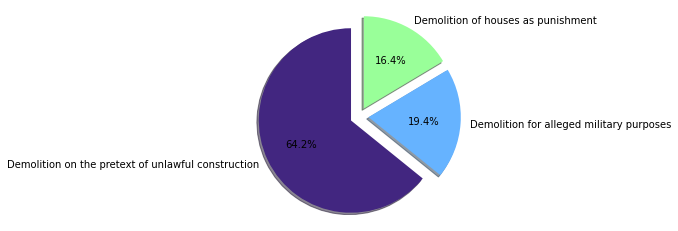

In [97]:
colors = ['#422680','#66b3ff','#99ff99','#ffcc99']
all_demolitions = data['Demolition Reason'].value_counts().to_dict()
x = list(all_demolitions.values())
labels = all_demolitions.keys()
explode = (0.1, 0.1, 0.1)
plt.figure(figsize=(900,1000))
fig1, ax1 = plt.subplots()
ax1.pie(x, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90, colors=colors)
ax1.axis('equal')
plt.show()

In [98]:
total_homeless_area = data['People Left Homeless'].groupby(data['Area']).sum().reset_index(name='Total People Left Homeless')

In [99]:
total_minors_area = data['Minors Left Homeless'].groupby(data['Area']).sum().reset_index(name='Total Minors Left Homeless')

In [100]:
total_homeless_area['Total Minors Left Homeless'] = total_minors_area['Total Minors Left Homeless']

<AxesSubplot:ylabel='Area'>

<Figure size 1440x504 with 0 Axes>

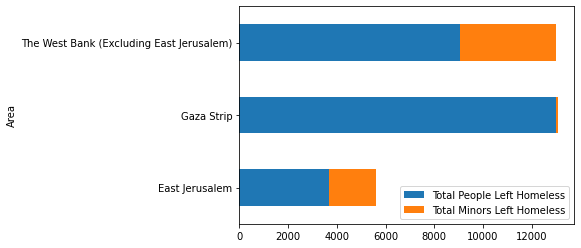

In [101]:
plt.figure(figsize=(20,7))
total_homeless_area.plot.barh(x = 'Area', stacked = True)

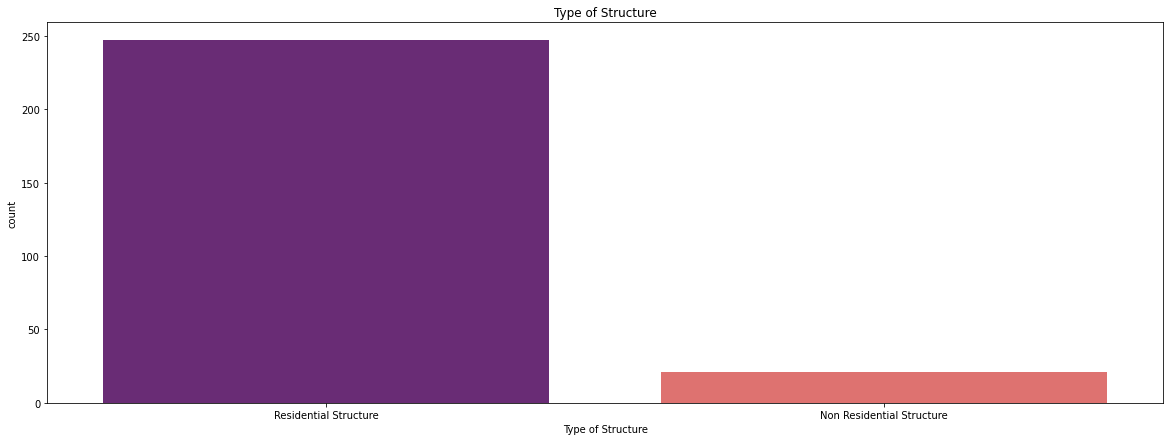

In [102]:
plt.figure(figsize=(20,7))
sn.countplot(data = data, x = 'Type of Structure',palette='magma').set_title('Type of Structure');

In [103]:
corr_matrix = data.corr()

print(corr_matrix)

                          Year  Housing Units  People Left Homeless  \
Year                  1.000000      -0.118553             -0.164993   
Housing Units        -0.118553       1.000000              0.965650   
People Left Homeless -0.164993       0.965650              1.000000   
Minors Left Homeless  0.119502       0.173937              0.063158   

                      Minors Left Homeless  
Year                              0.119502  
Housing Units                     0.173937  
People Left Homeless              0.063158  
Minors Left Homeless              1.000000  


In [104]:
X = data

In [105]:
Y = X['Area']

In [106]:
X = X.drop(['Area'], axis = 1)

In [107]:
X = pd.get_dummies(X)

In [108]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.80, random_state=42)

In [109]:
set(y_train)

{'East Jerusalem', 'Gaza Strip', 'The West Bank (Excluding East Jerusalem)'}

In [110]:
from sklearn.metrics import f1_score, classification_report, confusion_matrix, recall_score, precision_score, accuracy_score
from sklearn.metrics import plot_confusion_matrix


# Using SVM

In [111]:
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [112]:
clf = SVC(random_state=0)

In [113]:
clf.fit(X_train, y_train)

SVC(random_state=0)

In [114]:
predictions_svc = clf.predict(X_test)

In [115]:
print(classification_report(y_test, predictions_svc, digits=3))
print(confusion_matrix(y_test, predictions_svc))

                                          precision    recall  f1-score   support

                          East Jerusalem      0.000     0.000     0.000        45
                              Gaza Strip      0.000     0.000     0.000        22
The West Bank (Excluding East Jerusalem)      0.688     1.000     0.815       148

                                accuracy                          0.688       215
                               macro avg      0.229     0.333     0.272       215
                            weighted avg      0.474     0.688     0.561       215

[[  0   0  45]
 [  0   0  22]
 [  0   0 148]]


C:\Users\Sajiah Naqib\anaconda3\envs\adm\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Sajiah Naqib\anaconda3\envs\adm\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Sajiah Naqib\anaconda3\envs\adm\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


C:\Users\Sajiah Naqib\anaconda3\envs\adm\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


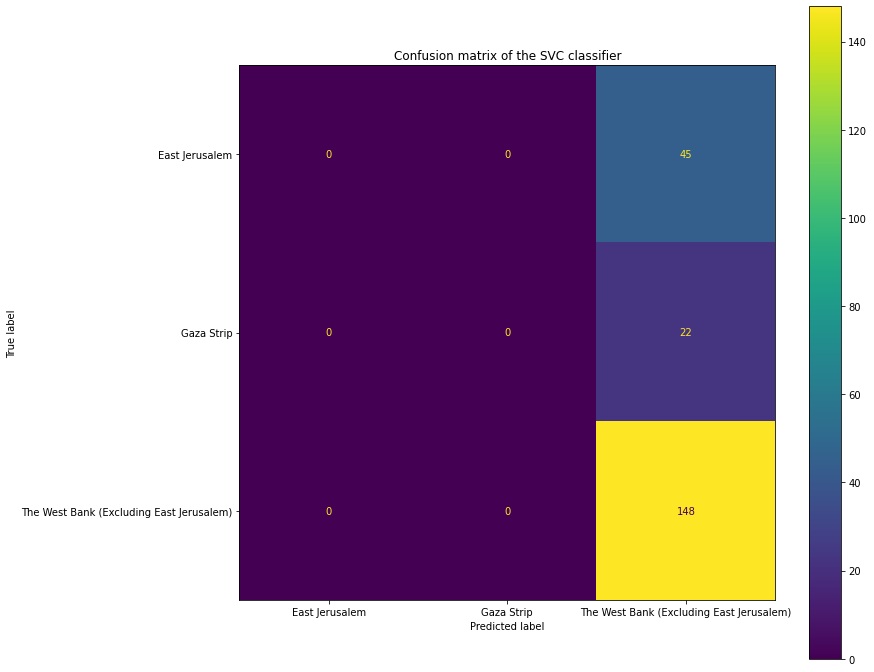

In [116]:
fig, ax = plt.subplots(figsize=(12, 12))
plot_confusion_matrix(clf, X_test, y_test, ax=ax)
plt.title('Confusion matrix of the SVC classifier')
plt.show()

# Using Logistic Regression

In [117]:
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression()

In [118]:
# fit and predict
lr_model.fit(X_train,
              y_train)
predictions = lr_model.predict(X_test)

C:\Users\Sajiah Naqib\anaconda3\envs\adm\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [119]:
print(classification_report(y_test, predictions, digits=3))
print(confusion_matrix(y_test, predictions))

                                          precision    recall  f1-score   support

                          East Jerusalem      0.750     0.467     0.575        45
                              Gaza Strip      0.500     0.273     0.353        22
The West Bank (Excluding East Jerusalem)      0.771     0.912     0.836       148

                                accuracy                          0.753       215
                               macro avg      0.674     0.551     0.588       215
                            weighted avg      0.739     0.753     0.732       215

[[ 21   0  24]
 [  0   6  16]
 [  7   6 135]]


C:\Users\Sajiah Naqib\anaconda3\envs\adm\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


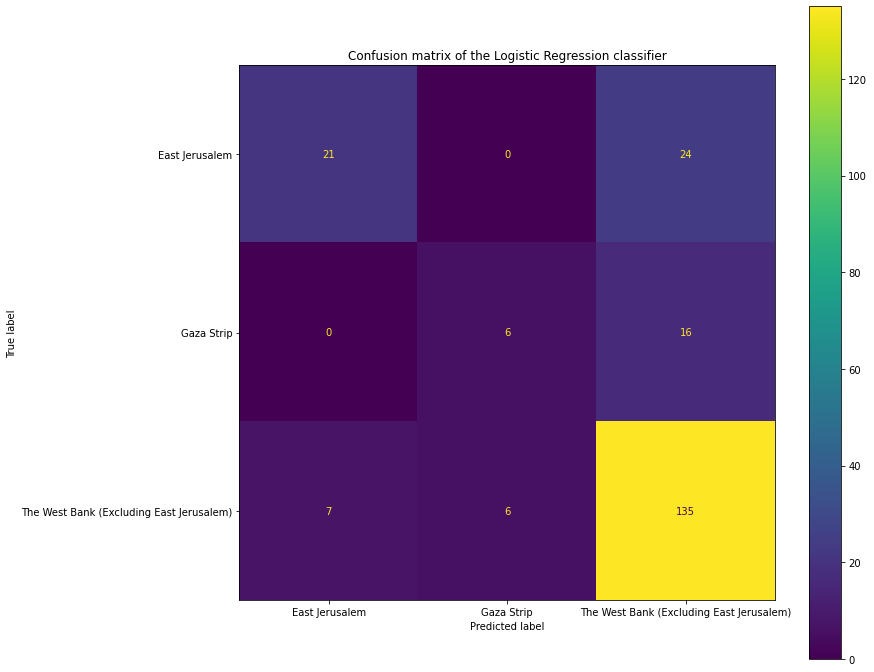

In [120]:
fig, ax = plt.subplots(figsize=(12, 12))
plot_confusion_matrix(lr_model, X_test, y_test, ax=ax)
plt.title('Confusion matrix of the Logistic Regression classifier')
plt.show()